# このスクリプトの位置付け

MNISTデータがどのような画像なのかを確認するため、Tensorflow 1.xのMNISTデータを加工して確認します。  
Tensorflow 1.xのMNIST画像データは28px X 28pxの画素配列ではなく、784行 X 1列の形式で格納されているため、画像として表示するためには、ちょっとした加工が必要です。

※ 同じMNISTでも、フレームワークごとに格納されているデータ形式が異なるようです。

# 各種ライブラリのインポート

In [1]:
# tensorflowライブラリのインポート
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 画素配列表示
import matplotlib.cm as cm
from matplotlib import pylab as plt

import numpy as np

# 定数設定

In [2]:
# MNIST画像データ保存場所
DATADIR = '../MNIST_data/'

# ラベル形式設定
# one_hot == True: 画像が「7」の場合、label=[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# one_hoe != True: 画像が「7」の場合、label=7
is_one_hot = True

# MNIST画像の読み込み

In [3]:
# 画像の読み込み
print("--- MNISTデータの読み込み開始 ---")
mnist = input_data.read_data_sets(DATADIR, one_hot=is_one_hot)
print("--- MNISTデータの読み込み完了 ---")

--- MNISTデータの読み込み開始 ---
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
--- MNISTデータの読み込み完了 ---


# MNIST画像データ数の確認

* 訓練画像   : 55,000
* テスト画像 : 10,000
* 検証画像   : 5,000

訓練画像で学習 → テスト画像で精度確認 → 検証画像で本番を想定した精度の検証、という感じ...だと思う。

In [4]:
### 訓練画像 ###
print('mnist.train.images = ' + str(len(mnist.train.images)))
### 検証画像 ###
print('mnist.test.images = {:d}'.format(len(mnist.test.images)))
### 検証画像 ###
print('mnist.validation.images = %d' % len(mnist.validation.images))

# 文字列の出力方法は3パターンある

mnist.train.images = 55000
mnist.test.images = 10000
mnist.validation.images = 5000


# 訓練画像の先頭画像表示

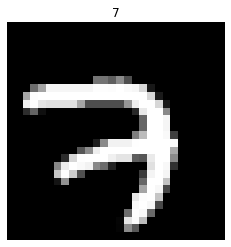

In [5]:
# データラベル形式
if is_one_hot == True:
    label = np.argmax(mnist.train.labels[0])
else:
    label = mnist.train.labels[0]

plt.imshow(mnist.train.images[0].reshape(28, 28), cmap = cm.Greys_r)
plt.title(str(label))
plt.axis('off')
plt.show()
plt.close()

In [6]:
# 画素配列
print(np.round(mnist.train.images[0].reshape(28, 28)).astype(np.int64))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 

# 訓練画像、テスト画像、検証画像の先頭10枚の表示

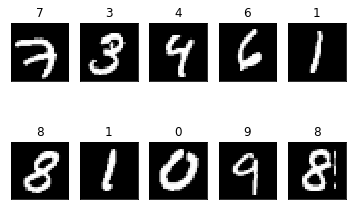

In [7]:
# 訓練画像
# 2行x5列の画像出力領域を確保
fig, axarr = plt.subplots(2, 5)
# 各出力領域に絵をセットする
for idx in range(10):
    ax = axarr[int(idx / 5)][idx % 5]
    ax.imshow(mnist.train.images[idx].reshape(28, 28), cmap = cm.Greys_r)

    label = ''
    if is_one_hot == True:
        label = np.argmax(mnist.train.labels[idx])
    else:
        label = mnist.train.labels[idx]
    ax.set_title(str(label))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
# 絵を出力する
plt.show()
plt.close()

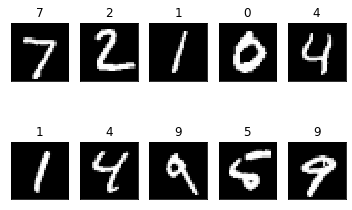

In [8]:
# テスト画像
# 2行x5列の画像出力領域を確保
fig, axarr = plt.subplots(2, 5)
# 各出力領域に絵をセットする
for idx in range(10):
    ax = axarr[int(idx / 5)][idx % 5]
    ax.imshow(mnist.test.images[idx].reshape(28, 28), cmap = cm.Greys_r)

    label = ''
    if is_one_hot == True:
        label = np.argmax(mnist.test.labels[idx])
    else:
        label = mnist.test.labels[idx]
    ax.set_title(str(label))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
# 絵を出力する
plt.show()
plt.close()

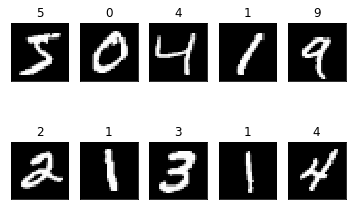

In [9]:
# 検証画像
# 2行x5列の画像出力領域を確保
fig, axarr = plt.subplots(2, 5)
# 各出力領域に絵をセットする
for idx in range(10):
    ax = axarr[int(idx / 5)][idx % 5]
    ax.imshow(mnist.validation.images[idx].reshape(28, 28), cmap = cm.Greys_r)

    label = ''
    if is_one_hot == True:
        label = np.argmax(mnist.validation.labels[idx])
    else:
        label = mnist.validation.labels[idx]
    ax.set_title(str(label))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
# 絵を出力する
plt.show()
plt.close()